In [1]:
import pandas as pd
import os
import numpy as np
import pickle

FIGURE_PATH = "figure"
DATA_PATH = "data"

os.makedirs(DATA_PATH,exist_ok=True)
os.makedirs(FIGURE_PATH,exist_ok=True)

In [2]:
# load dataset from the data directory
pytorch_metrics_df = pd.read_csv(os.path.join(DATA_PATH,"pytorch.csv"))
tensorflow_metrics_df = pd.read_csv(os.path.join(DATA_PATH,"tensorflow.csv"))

In [3]:
print("No. of issues in Pytorch closed with the last two years:", len(pytorch_metrics_df))
print("No. of issues in Tensorflow closed with the last two years:", len(tensorflow_metrics_df))

No. of issues in Pytorch closed with the last two years: 8288
No. of issues in Tensorflow closed with the last two years: 8240


### Exploratory Analysis (Data)

In [4]:
pytorch_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8288 non-null   int64 
 1   Comments   8288 non-null   int64 
 2   AuthorA    8288 non-null   object
 3   MTTF       8288 non-null   int64 
 4   Labels     57 non-null     object
 5   Reactions  8288 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 388.6+ KB


In [5]:
tensorflow_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8240 non-null   int64 
 1   Comments   8240 non-null   int64 
 2   AuthorA    8240 non-null   object
 3   MTTF       8240 non-null   int64 
 4   Labels     23 non-null     object
 5   Reactions  8240 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 386.4+ KB


In [6]:
pytorch_metrics_df.head()

,ID,Comments,AuthorA,MTTF,Labels,Reactions
0,177669684,26,CONTRIBUTOR,1977,module: sparse,5
1,184100988,10,CONTRIBUTOR,1609,triage review,5
2,206271010,2,NONE,1559,oncall: quantization,1
3,207957684,130,NONE,1818,module: nn,45
4,211165936,9,CONTRIBUTOR,1826,oncall: binaries,0


In [7]:
tensorflow_metrics_df.head()

,ID,Comments,AuthorA,MTTF,Labels,Reactions
0,115928097,542,NONE,2054,stat:contributions welcome,754
1,119009957,14,CONTRIBUTOR,2128,stat:awaiting response,0
2,141753240,27,CONTRIBUTOR,2043,stat:awaiting response,0
3,151235937,28,CONTRIBUTOR,2007,stat:awaiting tensorflower,41
4,161807205,12,CONTRIBUTOR,1916,stat:awaiting response,9


In [8]:
pytorch_metrics_df.describe()

,ID,Comments,MTTF,Reactions
count,8.288000e+03,8288.000000,8288.000000,8288.000000
mean,1.057714e+09,3.885738,154.668195,0.453909
std,3.123238e+08,5.612812,291.716967,4.663795
min,1.776697e+08,0.000000,0.000000,0.000000
25%,8.559442e+08,1.000000,1.000000,0.000000
50%,1.054110e+09,2.000000,16.000000,0.000000
75%,1.310861e+09,5.000000,142.000000,0.000000
max,1.585915e+09,130.000000,1977.000000,327.000000


In [9]:
tensorflow_metrics_df.describe()

,ID,Comments,MTTF,Reactions
count,8.240000e+03,8240.000000,8240.000000,8240.000000
mean,8.902466e+08,7.614442,294.749029,0.544175
std,3.283145e+08,9.323325,425.753392,8.946469
min,1.159281e+08,0.000000,0.000000,0.000000
25%,6.491385e+08,4.000000,12.000000,0.000000
50%,8.914700e+08,6.000000,29.000000,0.000000
75%,1.109322e+09,9.000000,500.000000,0.000000
max,1.582564e+09,542.000000,2180.000000,754.000000


In [10]:
pytorch_metrics_df[["Comments","Reactions"]].sum(axis=0)

Comments     32205
Reactions     3762
dtype: int64

In [11]:
tensorflow_metrics_df[["Comments","Reactions"]].sum(axis=0)

Comments     62743
Reactions     4484
dtype: int64

In [12]:
pytorch_metrics_df["AuthorA"].value_counts()

NONE            4267
CONTRIBUTOR     2823
COLLABORATOR     858
MEMBER           340
Name: AuthorA, dtype: int64

In [13]:
tensorflow_metrics_df["AuthorA"].value_counts()

NONE            7302
CONTRIBUTOR      873
MEMBER            63
COLLABORATOR       2
Name: AuthorA, dtype: int64

In [14]:
pytorch_metrics_df["Labels"].value_counts()

triaged                 11
high priority           10
oncall: distributed      7
module: ci               3
oncall: quantization     3
module: cuda             2
module: onnx             2
module: sparse           2
module: autograd         2
oncall: binaries         2
module: nn               2
oncall: jit              1
triage review            1
oncall: profiler         1
module: cpu              1
module: performance      1
module: bootcamp         1
module: dataloader       1
module: flaky-tests      1
needs reproduction       1
ci: sev                  1
bug                      1
Name: Labels, dtype: int64

In [15]:
tensorflow_metrics_df["Labels"].value_counts()

stat:awaiting response        14
stat:awaiting tensorflower     4
type:docs-bug                  2
stat:contributions welcome     1
type:support                   1
comp:lite                      1
Name: Labels, dtype: int64

### Exploratory Analysis (Graph)

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mlp
# %matplotlib inline

mlp.rcParams["figure.figsize"] = [9,6]
mlp.rc("xtick",labelsize=11)
mlp.rc("ytick",labelsize=11)
mlp.rc("axes",labelsize=11)

kwargs = dict(alpha=0.9, bins=10)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [19]:
# load whole dataset to access closed dates and created dates
pytorch_df = pickle.load(open(os.path.join(DATA_PATH,"pytorch.pkl"),"rb"))
tensorflow_df = pickle.load(open(os.path.join(DATA_PATH,"tensorflow.pkl"),"rb"))

In [20]:
print("No. of issues in Pytorch closed with the last two years:", len(pytorch_df))
print("No. of issues in Tensorflow closed with the last two years:", len(tensorflow_df))

No. of issues in Pytorch closed with the last two years: 8288
No. of issues in Tensorflow closed with the last two years: 8240


Saving figure data_distribution_MTTF_pt


[]

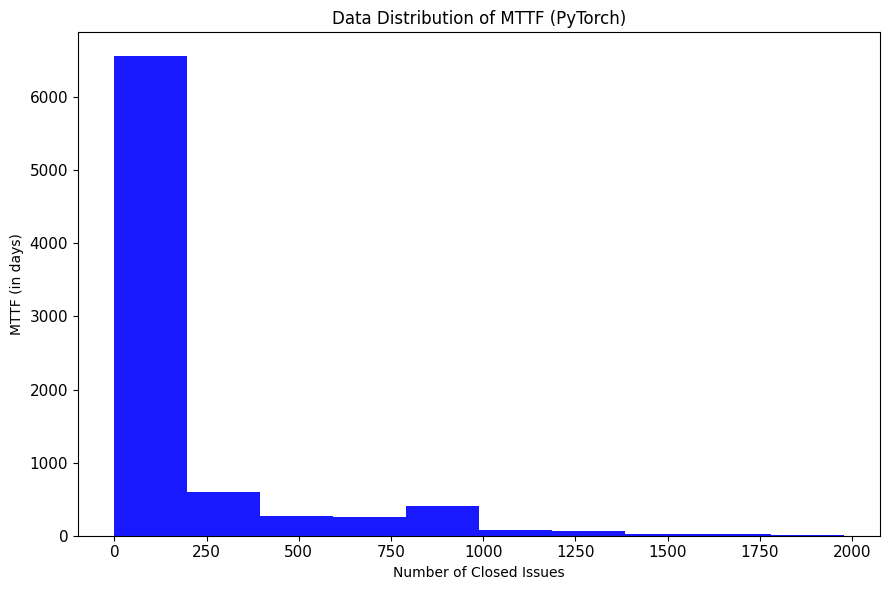

In [21]:
plt.hist(pytorch_metrics_df["MTTF"],**kwargs,color="b")
plt.ylabel("MTTF (in days)")
plt.xlabel("Number of Closed Issues")
plt.title("Data Distribution of MTTF (PyTorch)")
save_fig("data_distribution_MTTF_pt")
plt.plot()

Saving figure data_distribution_MTTF_tf


[]

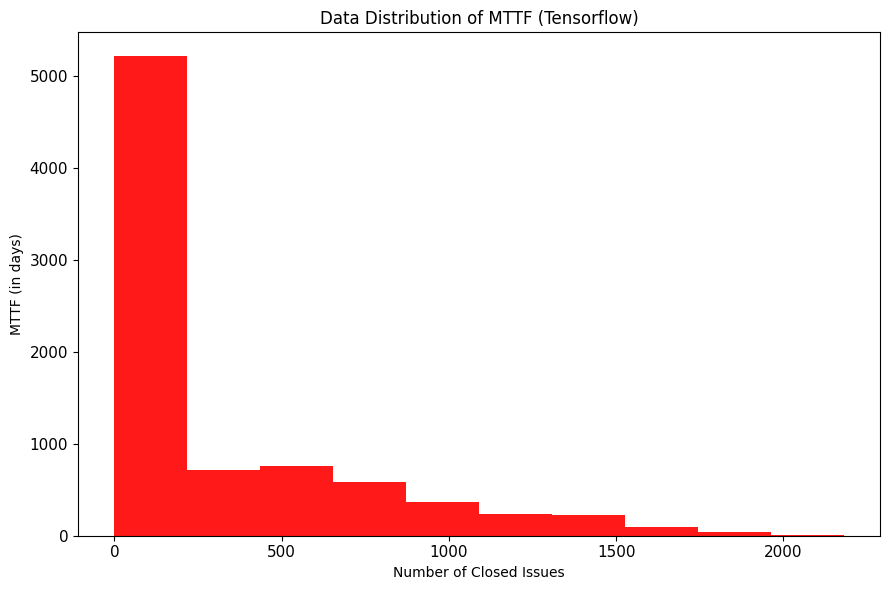

In [22]:
plt.hist(tensorflow_metrics_df["MTTF"],**kwargs,color="r")
plt.ylabel("MTTF (in days)")
plt.xlabel("Number of Closed Issues")
plt.title("Data Distribution of MTTF (Tensorflow)")
save_fig("data_distribution_MTTF_tf")
plt.plot()

Saving figure sample_distribution_MTTF_both


[]

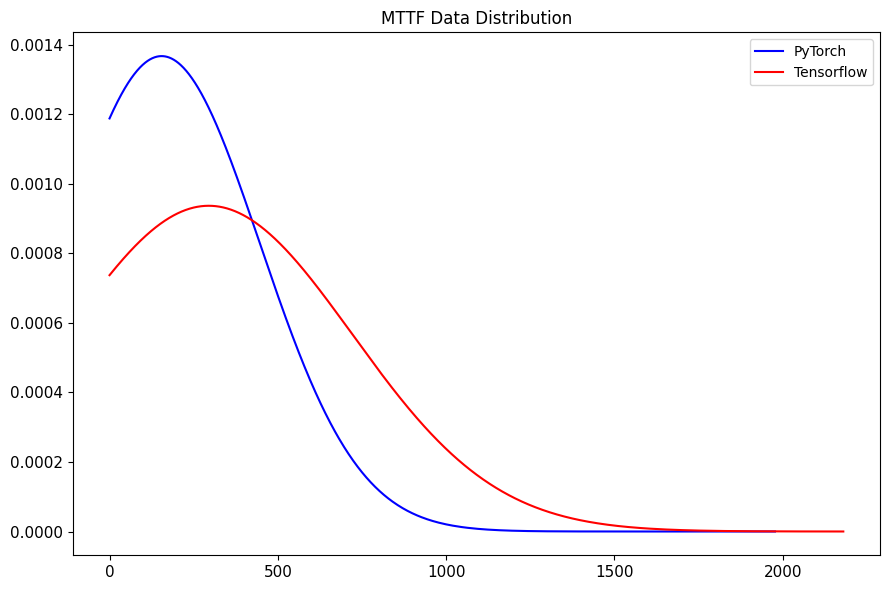

In [23]:
from scipy.stats import norm

x_axis = pytorch_metrics_df["MTTF"].sort_values()
mean = x_axis.mean()
sd = x_axis.std()
plt.plot(x_axis, norm.pdf(x_axis, mean, sd),color="b",label="PyTorch")

x_axis = tensorflow_metrics_df["MTTF"].sort_values()
mean = x_axis.mean()
sd = x_axis.std()
plt.plot(x_axis, norm.pdf(x_axis, mean, sd),color="r",label="Tensorflow")
plt.title("MTTF Data Distribution")
plt.legend()
save_fig("sample_distribution_MTTF_both")
plt.plot()


Saving figure MTTF_created_pytorch


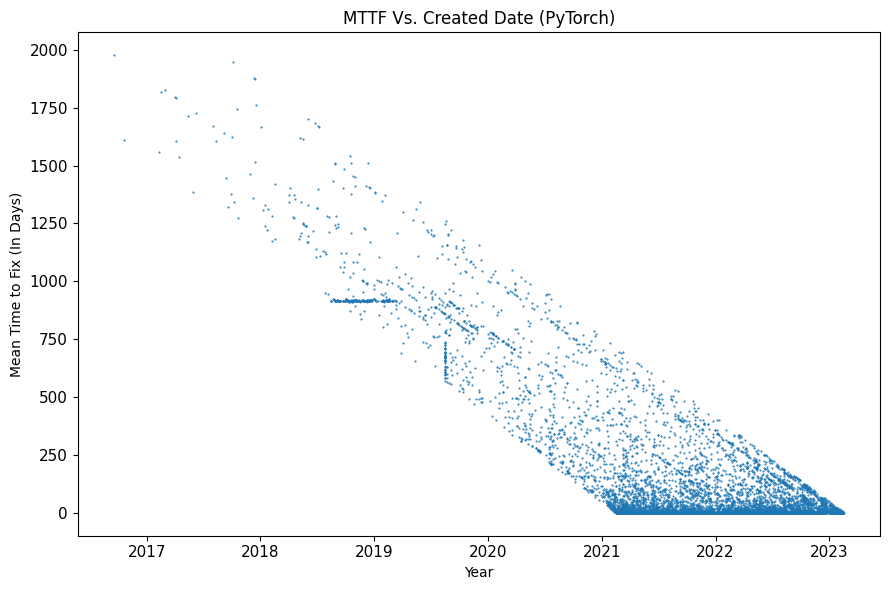

In [24]:
plt.plot(pytorch_df["created_at"],pytorch_metrics_df["MTTF"],".",markersize=1)
plt.xlabel("Year")
plt.ylabel("Mean Time to Fix (In Days)")
plt.title("MTTF Vs. Created Date (PyTorch)")
save_fig("MTTF_created_pytorch")
plt.show()

Saving figure MTTF_closed_pytorch


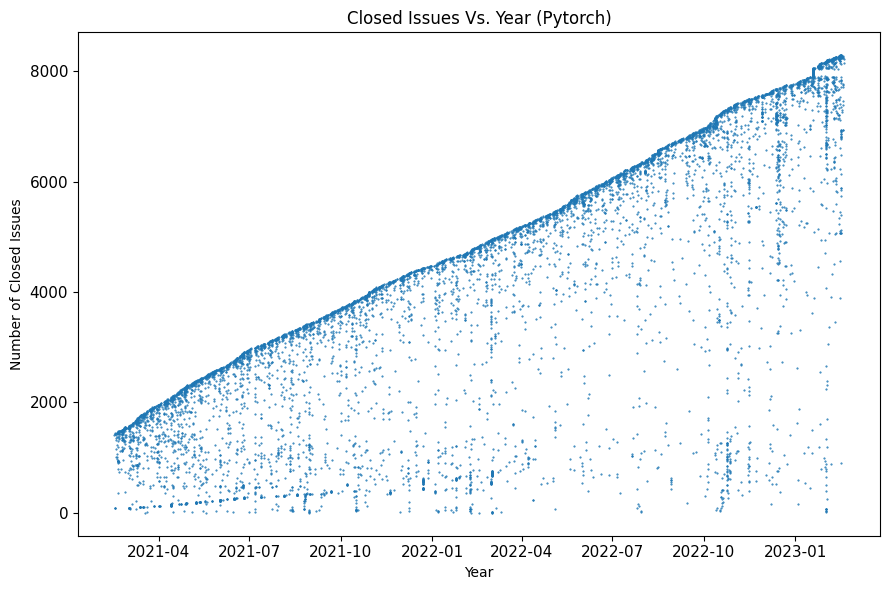

In [25]:
plt.plot(pytorch_df["closed_at"],range(0,len(pytorch_df["created_at"])),".",markersize=1)
plt.xlabel("Year")
plt.ylabel("Number of Closed Issues")
plt.title("Closed Issues Vs. Year (Pytorch)")
save_fig("MTTF_closed_pytorch")
plt.show()

Saving figure MTTF_created_tensorflow


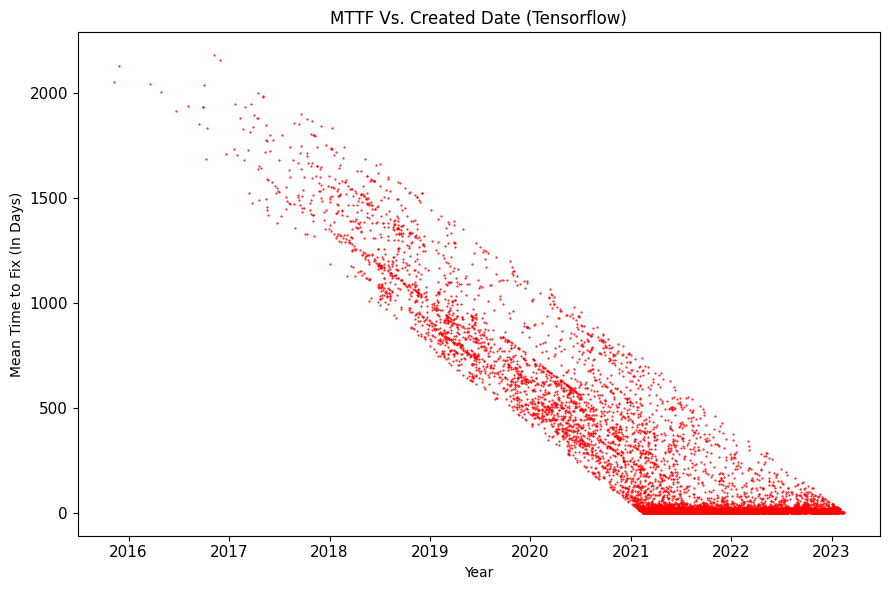

In [26]:
plt.plot(tensorflow_df["created_at"],tensorflow_metrics_df["MTTF"],"r.",markersize=1)
plt.xlabel("Year")
plt.ylabel("Mean Time to Fix (In Days)")
plt.title("MTTF Vs. Created Date (Tensorflow)")
save_fig("MTTF_created_tensorflow")
plt.show()

Saving figure MTTF_closed_tensorflow


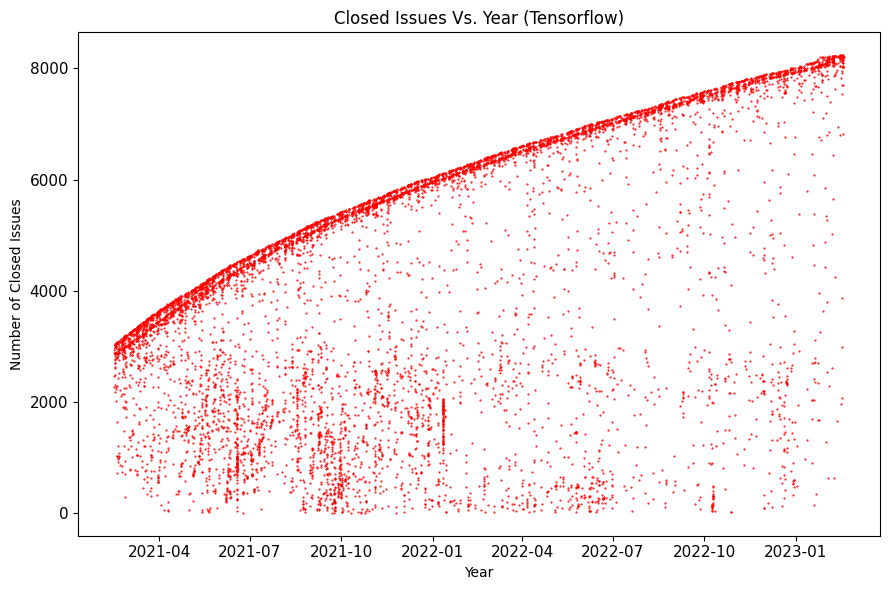

In [27]:
plt.plot(tensorflow_df["closed_at"],range(0,len(tensorflow_df["created_at"])),"r.",markersize=1)
plt.xlabel("Year")
plt.ylabel("Number of Closed Issues")
plt.title("Closed Issues Vs. Year (Tensorflow)")
save_fig("MTTF_closed_tensorflow")
plt.show()

Saving figure disrt_AA_pt


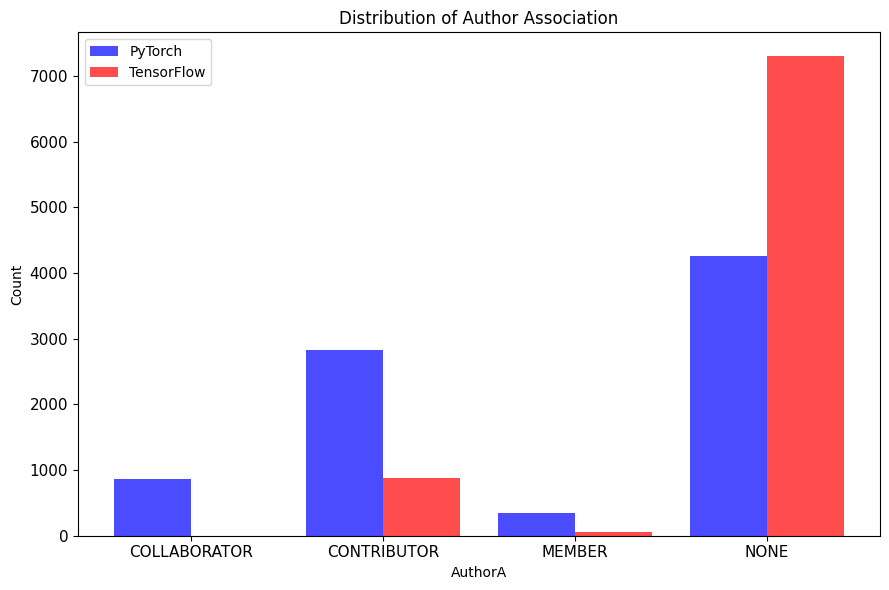

In [28]:
pytorch_series = pytorch_metrics_df["AuthorA"].value_counts().sort_index()
tensorflow_series = tensorflow_metrics_df["AuthorA"].value_counts().sort_index()
plt.bar(np.arange(len(pytorch_series.index))-0.2,pytorch_series.values,width=0.4,color="b",alpha=0.7,label="PyTorch")
plt.bar(np.arange(len(tensorflow_series.index))+0.2,tensorflow_series.values,width=0.4,color="r",alpha=0.7,label="TensorFlow")
plt.xticks(range(4),pytorch_series.index)
plt.legend()
plt.title("Distribution of Author Association")
plt.xlabel("AuthorA")
plt.ylabel("Count")
save_fig("disrt_AA_pt")
plt.show()

Saving figure dist_gra_labels_pt


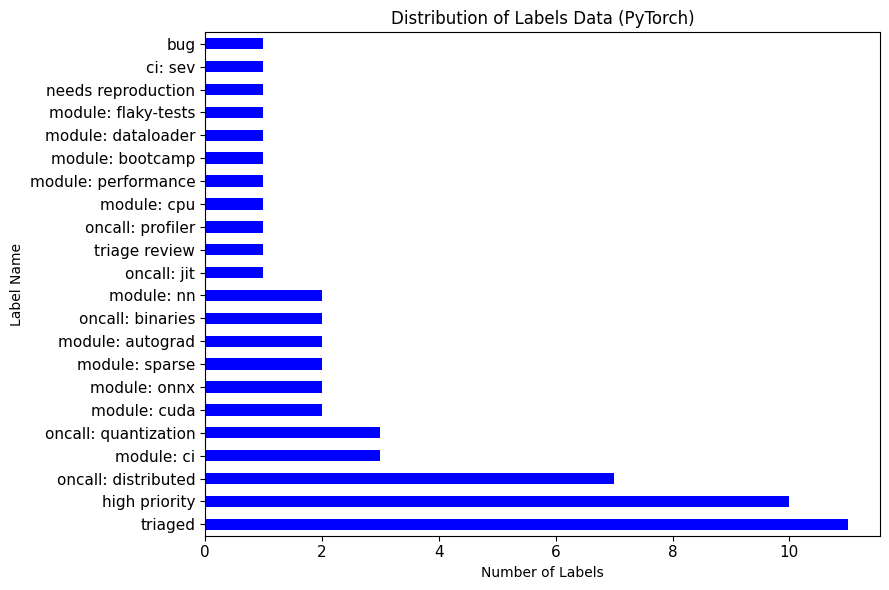

In [29]:
pytorch_metrics_df["Labels"].value_counts().plot(kind="barh",color="b")
plt.title("Distribution of Labels Data (PyTorch)")
plt.xlabel("Number of Labels")
plt.ylabel("Label Name")
save_fig("dist_gra_labels_pt")
plt.show()

Saving figure dist_gra_labels_tf


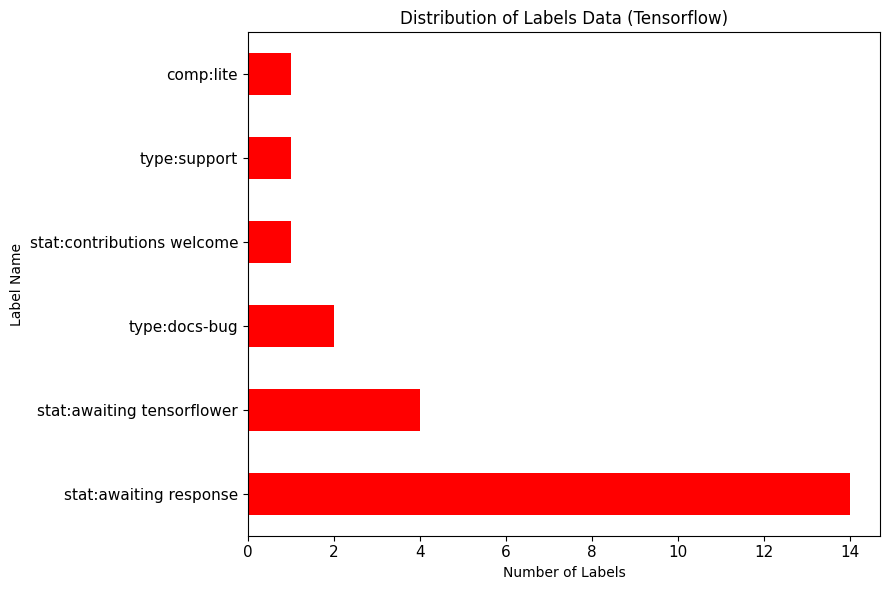

In [30]:
tensorflow_metrics_df["Labels"].value_counts().plot(kind="barh",color="r")
plt.title("Distribution of Labels Data (Tensorflow)")
plt.xlabel("Number of Labels")
plt.ylabel("Label Name")
save_fig("dist_gra_labels_tf")
plt.show()

Saving figure comm_pt


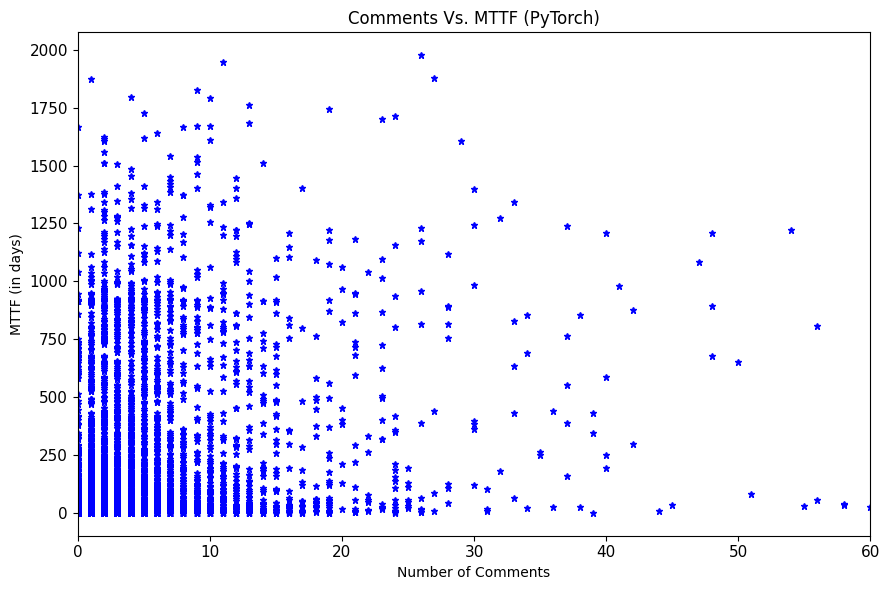

In [31]:
plt.plot(pytorch_metrics_df["Comments"],pytorch_metrics_df["MTTF"],"b*",markersize=5)
plt.xlim(0,60)
plt.title("Comments Vs. MTTF (PyTorch)")
plt.xlabel("Number of Comments")
plt.ylabel("MTTF (in days)")
save_fig("comm_pt")
plt.show()

Saving figure comm_tf


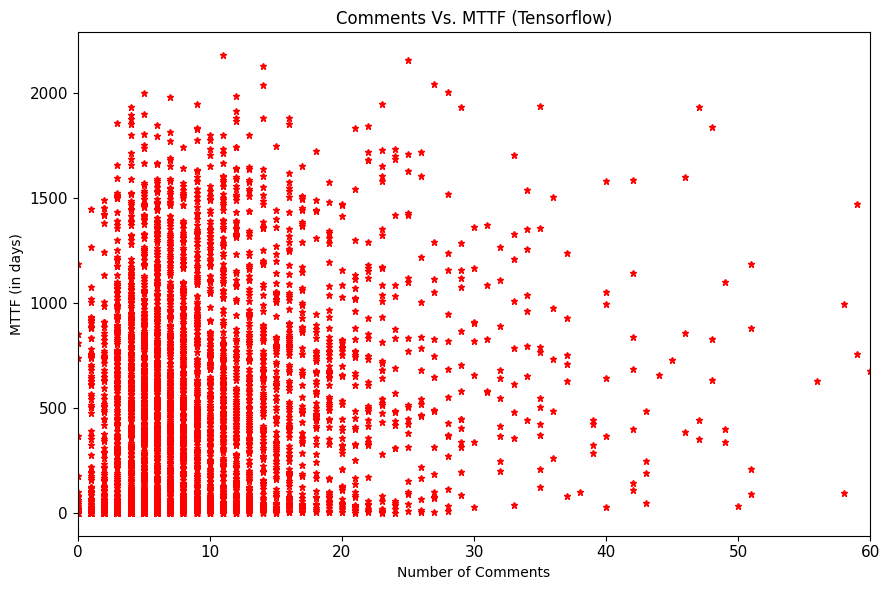

In [32]:

plt.plot(tensorflow_metrics_df["Comments"],tensorflow_metrics_df["MTTF"],"r*",markersize=5)
plt.xlim(0,60)
plt.title("Comments Vs. MTTF (Tensorflow)")
plt.xlabel("Number of Comments")
plt.ylabel("MTTF (in days)")
save_fig("comm_tf")
plt.show()

Saving figure react_pt


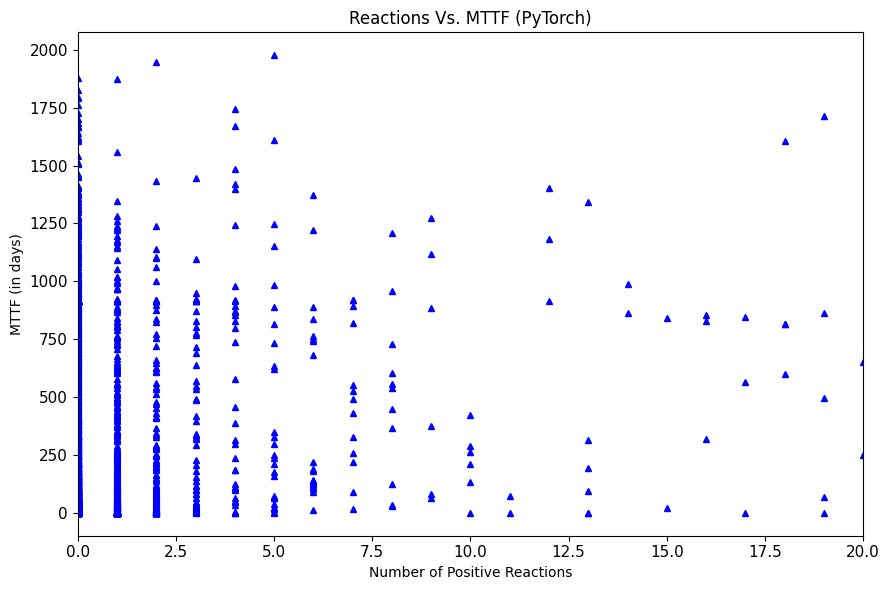

In [33]:
plt.plot(pytorch_metrics_df["Reactions"],pytorch_metrics_df["MTTF"],"b^",markersize=5)
plt.xlim(0,20)
plt.title("Reactions Vs. MTTF (PyTorch)")
plt.xlabel("Number of Positive Reactions")
plt.ylabel("MTTF (in days)")
save_fig("react_pt")
plt.show()

Saving figure react_tf


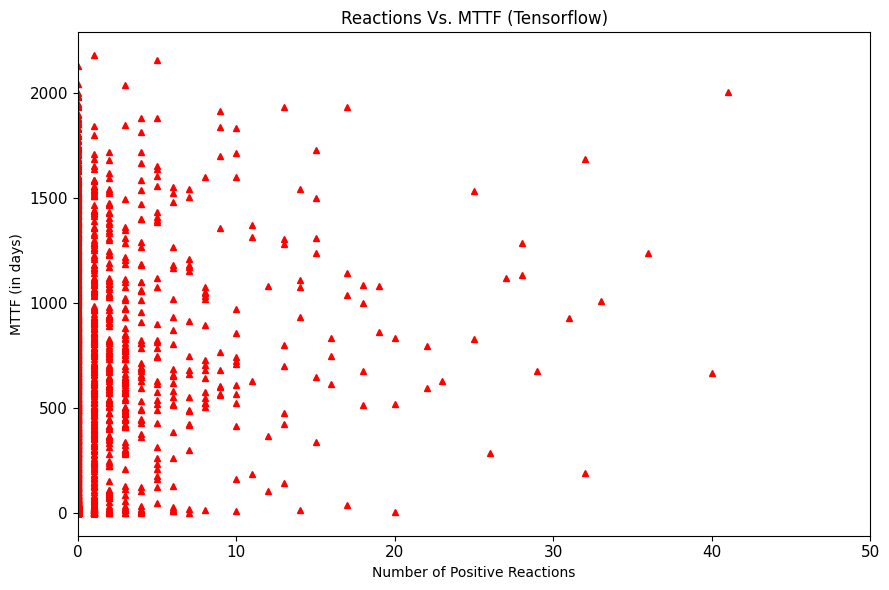

In [34]:
plt.plot(tensorflow_metrics_df["Reactions"],tensorflow_metrics_df["MTTF"],"r^",markersize=5)
plt.xlim(0,50)
plt.title("Reactions Vs. MTTF (Tensorflow)")
plt.xlabel("Number of Positive Reactions")
plt.ylabel("MTTF (in days)")
save_fig("react_tf")
plt.show()